# Lab 01: Data pre-processing

- Student ID: 21127329
- Student name: Châu Tấn Kiệt

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler, OneHotEncoder

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'c:\\Users\\ACER\\HCMUS-4YOS\\3rd Year\\Semester 2\\Data Mining\\Lab1\\.venv\\Scripts\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
# YOUR CODE HERE
raw_df = pd.read_csv('./data/spaceX_laucnh.csv')
# raise NotImplementedError()

In [7]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [8]:
# YOUR CODE HERE
shape = raw_df.shape
shape
# raise NotImplementedError()

(205, 17)

In [9]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

YOUR ANSWER HERE

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [10]:
# YOUR CODE HERE
num_duplicated_rows =  len(raw_df)-len(raw_df.drop_duplicates())
num_duplicated_rows
# raise NotImplementedError()

0

In [11]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [12]:
# YOUR CODE HERE
metadata = pd.read_json('./data/metadata.json')
#raise NotImplementedError()

In [13]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
landpad,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The landpad information.
landpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the landing pad.
landpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the landing pad.
landpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the landing pad.
landpad_type,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The type of the landing pad.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
launchpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the launchpad.
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.
outcome,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Boolean indicating launch success or failure.


**TODO: Describe datatype**

|Attributes|Description|
| --- | --- |
|uct_time|Launch date in UTC format.|
|launch_name|Launch name. Typically the name of the space mission.|
|payloads|The list information about the payloads on the launch.|
|rocket_name|The name of the rocket.|
|rocket_boosters|The number of boosters on the rocket.|
|rocket_height|The height information about the rocket (m).|
|rocket_diameter|The diameter information about the rocket (m).|
|rocket_mass|The mass information about the rocket (kg).|
|launchpad_name|The name of the launchpad.|
|launchpad_region|The region of the launchpad.|
|launchpad_geo|The geo location of the launchpad.|
|landpad|The landpad information.|
|landpad_name|The name of the landing pad.|
|landpad_type|The type of the landing pad.|
|landpad_region|The region of the landing pad.|
|landpad_geo|The geo location of the landing pad.|
|outcome|Indicating launch success or failure.|

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [14]:
# YOUR CODE HERE
dtypes = raw_df.dtypes
dtypes
# raise NotImplementedError()

uct_time             object
launch_name          object
payloads             object
rocket_name          object
rocket_boosters       int64
rocket_height       float64
rocket_diameter     float64
rocket_mass         float64
launchpad_name       object
launchpad_region     object
launchpad_geo        object
landpad             float64
landpad_name         object
landpad_type         object
landpad_region       object
landpad_geo          object
outcome              object
dtype: object

In [15]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [16]:
# YOUR CODE HERE
raw_df["uct_time"] = pd.to_datetime(raw_df["uct_time"])
raw_df["uct_time"]
# raise NotImplementedError()

0     2006-03-24 22:30:00+00:00
1     2007-03-21 01:10:00+00:00
2     2008-08-03 03:34:00+00:00
3     2008-09-28 23:15:00+00:00
4     2009-07-13 03:35:00+00:00
                 ...           
200   2022-12-01 00:00:00+00:00
201   2022-12-01 00:00:00+00:00
202   2022-12-01 00:00:00+00:00
203   2022-12-01 00:00:00+00:00
204   2022-12-01 00:00:00+00:00
Name: uct_time, Length: 205, dtype: datetime64[ns, UTC]

In [17]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [18]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


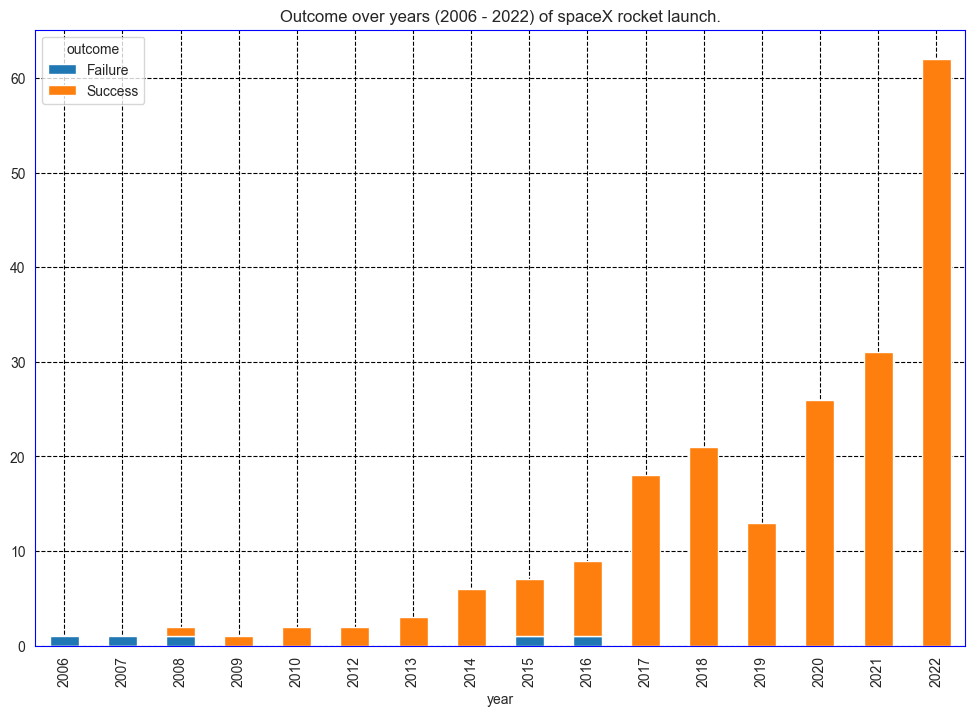

In [19]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

It is clear that after 2008, the number of fail launches dropped significantly, with the exception of 2015 and 2016. We can also see a steady increase throughout the years, except for the sudden drop at 2019 and the number of successful launches doubled up in 2022

### Exploring numerical attributes

In [20]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [21]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE
    # print(len(s))
    return (s.isnull().sum() / len(s)).round(1)
    raise NotImplementedError()

def median(df):
    # TODO:
    # YOUR CODE
    med = df.median().round(1)
    return med
    raise NotImplementedError()

def lower_quartile(df):
    # TODO:
    # YOUR CODE HERE
    lower_Quartile = df.quantile(0.25).round(1)
    return lower_Quartile
    raise NotImplementedError()

def upper_quartile(df):
    # TODO:
    # YOUR CODE HERE
    upper_Quartile = df.quantile(0.75).round(1)
    return upper_Quartile
    raise NotImplementedError()

In [22]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,0.30,0.30,0.3,1.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [23]:
# YOUR CODE HERE
raw_df = raw_df.drop(columns="landpad")
num_col_info_df = num_col_df.drop(columns="landpad")
num_col_df = num_col_df.drop(columns="landpad")
# raise NotImplementedError()

In [24]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [25]:
# YOUR CODE HERE
## Mean fill
mean_fill = num_col_df.fillna(value=num_col_df.mean())
# raise NotImplementedError()
num_col_df["mean_fill_rocket_height"] = mean_fill['rocket_height']

In [26]:
# YOUR CODE HERE
## Median fill
med_fill = num_col_df.fillna(value=median(num_col_df))
# raise NotImplementedError()
num_col_df["median_fill_rocket_height"] = med_fill['rocket_height']

In [27]:
# YOUR CODE HERE
## Mode fill
mode_fill = num_col_df.copy()
mode = mode_fill.filter(["rocket_boosters","rocket_height",  "rocket_diameter",  "rocket_mass"]).mode()
cols = ["rocket_boosters","rocket_height",  "rocket_diameter",  "rocket_mass"]
mode_fill[cols]=num_col_df[cols].fillna(mode_fill.mode().iloc[0])
mode_fill.head()
num_col_df["mode_fill_rocket_height"]  = mode_fill['rocket_height']
# raise NotImplementedError()

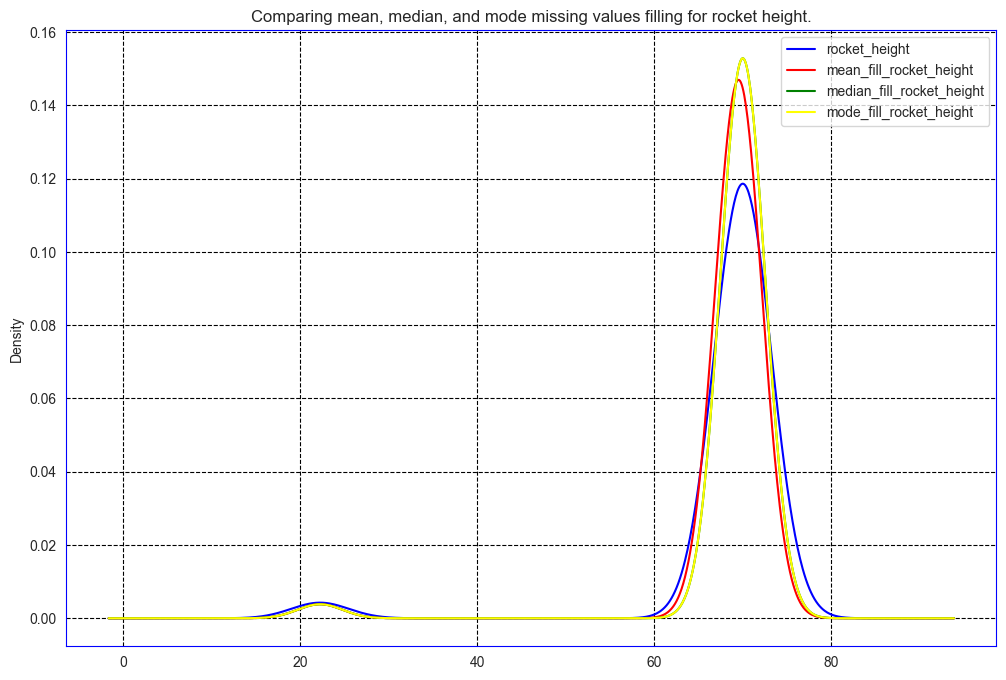

In [28]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

The median and mode fill are nearly the same as each other, while mean fill is a little bit lower in density

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [29]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    rocket_df = raw_df[raw_df["rocket_name"] == rocket_name]
    min_height = min(rocket_df["rocket_height"])
    max_height = max(rocket_df["rocket_height"])
    return (min_height,max_height)
    raise NotImplementedError()

In [30]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [31]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [32]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [33]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    cp_df["rocket_height"] = cp_df["rocket_height"].fillna(value=df["rocket_height"].median())
    # raise NotImplementedError()
    return cp_df

# raw_df = fill_rocketheight(raw_df)
raw_df["rocket_height"] = raw_df["rocket_height"].fillna(value=raw_df["rocket_height"].median())

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [34]:
# YOUR CODE HERE
def fill_rocketdiameter(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    cp_df = cp_df.fillna(value=cp_df.mean())
    # raise NotImplementedError()
    return cp_df

def fill_rocketmass(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    cp_df = cp_df.fillna(value=cp_df.mean())
    # raise NotImplementedError()
    return cp_df

# raw_df["rocket_diameter"] = fill_rocketdiameter(raw_df["rocket_diameter"])
# raw_df["rocket_mass"] = fill_rocketmass(raw_df["rocket_mass"])
raw_df["rocket_diameter"] = raw_df["rocket_diameter"].fillna(value=raw_df["rocket_diameter"].mean())
raw_df["rocket_mass"] = raw_df["rocket_mass"].fillna(value=raw_df["rocket_mass"].mean())
# raise NotImplementedError()

In [35]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [36]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

- `rocket_boosters` : discrete
- `rocket_height` : continuous 
- `rocket_diameter` : continuous 
- `rocket_mass` : continuous 

### Exploring non-numerical attributes

In [37]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [38]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})

    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    # YOUR CODE HERE
    # s = s.replace("[","(")
    # s = s.replace("]",")")
    # res = json.loads(s)
    res = list(eval(s))    
    return res
    raise NotImplementedError()

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [39]:
# TODO:
# YOUR CODE HERE
cate_col_df['payloads'] =cate_col_df['payloads'].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')
# Convert to string
# cate_col_df['payloads'] = cate_col_df['payloads'].astype(str)
# raw_df['payloads'].dtype

# raise NotImplementedError()

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [40]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return ((s.isnull().sum() * 100) / len(s)).round(1)
    raise NotImplementedError()

def num_values(s):
    # TODO:
    # YOUR CODE HERE
    return s.nunique()
    raise NotImplementedError()

def value_ratios(s):
    # TODO: 
    # YOUR CODE HERE
    percent = ((s.value_counts(normalize=True) * 100).round(1))
    return percent.to_dict()
    raise NotImplementedError()

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
# cat_col_info_df = cate_col_df.agg([missing_ratio])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,1.4,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,NaN,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...",NaN,"{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [41]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

We shouldn't delete these attributes because the ratio is < 70% 

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [42]:
# TODO:
# YOUR CODE HERE
cate_col_df = cate_col_df.drop(cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_region"].isnull() & cate_col_df["landpad_type"].isnull()].index)
cate_col_df = cate_col_df.drop(cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull()].index)
cate_col_df = cate_col_df.drop(cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_region"].isnull()].index)
cate_col_df = cate_col_df.drop(cate_col_df[cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()].index)

#raise NotImplementedError()

In [43]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [44]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,NaN,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...",NaN,"{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS |  Port Canaveral, Florida  |
| LZ-1  | RTLS | Florida | 
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS | Florida |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?


- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

- Falcon 9 rockets which have landpad name is `LZ-1`, and landpad type is `RTLS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `LZ-4`, and landpad type is `RTLS` => landpad region `California`

In [45]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    
    # YOUR CODE HERE
    df_cp = df.copy()
    m1 = (df_cp['landpad_name'] == "OCISLY") & (df_cp['landpad_type'] == "ASDS")
    m2 = (df_cp['landpad_name'] == "JRTI") & (df_cp['landpad_type'] ==  "ASDS")
    m3 = (df_cp['landpad_name'] == "ASOG") & (df_cp['landpad_type'] == "ASDS")
    m4 = (df_cp['landpad_name'] == "LZ-1") & (df_cp['landpad_type'] ==  "RTLS")
    m5 = (df_cp['landpad_name'] == "LZ-4") & (df_cp['landpad_type'] == "RTLS") 
    df_cp.loc[m1,'landpad_region'] = df_cp.loc[m1,'landpad_region'].fillna('California')
    df_cp.loc[m2,'landpad_region'] = df_cp.loc[m2,'landpad_region'].fillna('Florida')
    df_cp.loc[m3,'landpad_region'] = df_cp.loc[m3,'landpad_region'].fillna('Florida')
    df_cp.loc[m4,'landpad_region'] = df_cp.loc[m4,'landpad_region'].fillna('Florida')
    df_cp.loc[m5,'landpad_region'] = df_cp.loc[m5,'landpad_region'].fillna('California')

    return df_cp
    raise NotImplementedError()

    if (df is None):
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()

    return df_cp

cate_col_df = fill_landpadregion(cate_col_df)

TODO: Fill missing values for all `raw_df`

In [46]:
# YOUR CODE HERE
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)
raw_df = raw_df.explode('payloads')

raw_df = raw_df.drop(raw_df[raw_df["landpad_name"].isnull() & raw_df["landpad_type"].isnull()].index)
raw_df = raw_df.drop(raw_df[raw_df["landpad_name"].isnull() & raw_df["landpad_region"].isnull()].index)
raw_df = raw_df.drop(raw_df[raw_df["landpad_type"].isnull() & raw_df["landpad_region"].isnull()].index)

raw_df = fill_landpadregion(raw_df)
# raise NotImplementedError()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 18 to 186
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   uct_time          152 non-null    datetime64[ns, UTC]
 1   launch_name       152 non-null    object             
 2   payloads          152 non-null    object             
 3   rocket_name       152 non-null    object             
 4   rocket_boosters   152 non-null    int64              
 5   rocket_height     152 non-null    float64            
 6   rocket_diameter   152 non-null    float64            
 7   rocket_mass       152 non-null    float64            
 8   launchpad_name    152 non-null    object             
 9   launchpad_region  152 non-null    object             
 10  launchpad_geo     152 non-null    object             
 11  landpad_name      152 non-null    object             
 12  landpad_type      152 non-null    object             
 13  land

In [47]:
# TEST 01
assert raw_df.shape == (152, 16)

In [48]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,NaN,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...",NaN,"{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [49]:
cate_col_df.reset_index(drop=True,inplace=True)

In [50]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [51]:
# YOUR CODE HERE
# cate_col_df2 = cate_col_df2.drop(cate_col_df2[cate_col_df2["type"].isna() & cate_col_df2["mass"].isna() & cate_col_df2["orbit"].isna()].index)
cate_col_df2 = cate_col_df2.drop(cate_col_df2[cate_col_df2["type"].isnull() & cate_col_df2["mass"].isnull()].index)
cate_col_df2 = cate_col_df2.drop(cate_col_df2[cate_col_df2["type"].isnull() & cate_col_df2["orbit"].isnull()].index)
cate_col_df2 = cate_col_df2.drop(cate_col_df2[cate_col_df2["mass"].isnull() & cate_col_df2["orbit"].isnull()].index)
# raise NotImplementedError()

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [52]:
# YOUR CODE HERE
drop_idx = cate_col_df2[cate_col_df2["mass"].isna()].index
# raise NotImplementedError()

In [53]:
cate_col_df2.drop(drop_idx, inplace=True)
cate_col_df2.reset_index(drop=True,inplace=True)


In [54]:
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])
cat_col_info_df2


,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,orbit
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,141,2,3,2,3,6,2,2,4,2,4,11
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.4, 'CRS-5': 0.7, 'DART': 0.7, 'GPS III SV05...","{'Falcon 9': 97.9, 'Falcon Heavy': 2.1}","{'CCSFS SLC 40': 52.1, 'KSC LC 39A': 32.4, 'VAFB SLC 4E': 15.5}","{'Florida': 84.5, 'California': 15.5}","{'(28.5618571, -80.577366)': 52.1, '(28.6080585, -80.6039558)': 32.4, '(34.632093, -120.610829)'...","{'OCISLY': 44.4, 'JRTI': 28.2, 'ASOG': 14.1, 'LZ-1': 8.5, 'LZ-4': 3.5, 'JRTI-1': 1.4}","{'ASDS': 88.0, 'RTLS': 12.0}","{'Florida': 52.1, 'California': 47.9}","{'(33.7291858, -118.262015)': 58.5, '(28.4104, -80.6188)': 29.6, '(28.485833, -80.544444)': 8.5,...","{'Success': 98.6, 'Failure': 1.4}","{'Satellite': 82.4, 'Dragon 1.1': 9.9, 'Crew Dragon': 4.2, 'Dragon 2.0': 3.5}","{'VLEO': 41.5, 'ISS': 16.9, 'GTO': 15.5, 'PO': 7.0, 'SSO': 6.3, 'LEO': 5.6, 'MEO': 2.8, 'GEO': 1..."


In [55]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [56]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
raw_df.reset_index(drop=True,inplace=True)
raw_df = raw_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
raw_df.head()
# raise NotImplementedError()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


In [57]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df = raw_df.rename(columns={"type": "payloads_type", "mass": "payloads_mass", "orbit" : "payloads_orbit"})
# raise NotImplementedError()

In [58]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
raw_df = raw_df.drop(raw_df[raw_df["payloads_type"].isnull() & raw_df["payloads_mass"].isnull()].index)
raw_df = raw_df.drop(raw_df[raw_df["payloads_type"].isnull() & raw_df["payloads_orbit"].isnull()].index)
raw_df = raw_df.drop(raw_df[raw_df["payloads_mass"].isnull() & raw_df["payloads_orbit"].isnull()].index)
# raise NotImplementedError()

In [59]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
raw_df = raw_df.dropna(subset=['payloads_mass'])
#raw_df.drop(drop_idx, inplace=True)
raw_df.reset_index(drop=True,inplace=True)
# raise NotImplementedError()

In [60]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [61]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [62]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    return eval(s)
    #raise NotImplementedError()

In [63]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [64]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [65]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `one hot encoding`, and for `nominal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [66]:
# YOUR CODE HERE
launch_name_enc = pd.get_dummies(raw_df['launch_name'])
launch_name_enc.astype(int)
# raise NotImplementedError()

,ABS-2A / Eutelsat 117W B,ANASIS-II,Amos-6,ArabSat 6A,Ax-1,Bangabandhu-1,Boeing X-37B OTV-5,BulgariaSat-1,CCtCap Demo Mission 1,CCtCap Demo Mission 2,CRS-10,CRS-11,CRS-12,CRS-13,CRS-16,CRS-17,CRS-18,CRS-19,CRS-20,CRS-21,CRS-22 & IROSA,CRS-23,CRS-24,CRS-5,CRS-6,CRS-7,CRS-8,CRS-9,CSG-2,Crew-1,Crew-3,Crew-4,DART,Es’hail 2,Falcon Heavy Test Flight,FormoSat-5,GPS III SV03 (Columbus),GPS III SV04 (Sacagawea),GPS III SV05,Globalstar FM15,IXPE,Inspiration4,Iridium NEXT Mission 1,Iridium NEXT Mission 2,Iridium NEXT Mission 3,Iridium NEXT Mission 7,Iridium NEXT Mission 8,JCSAT-16,JCSAT-2B,JCSat 18 / Kacific 1,Jason 3,KPLO,KoreaSat 5A,Merah Putih,NROL-85,Nilesat-301,Nusantara Satu (PSN-6) / S5 / Beresheet,OG-2 Mission 2,RADARSAT Constellation,SAOCOM 1A,"SAOCOM 1B, GNOMES-1, Tyvak-0172",SARah 1,SES-10,SES-11 / Echostar 105,SES-22,SES-9,SSO-A,STP-2,SXM-7,SXM-8,Sentinel-6 Michael Freilich,Starlink 2-1 (v1.5),Starlink 3-1 (v1.5),Starlink 3-2 (v1.5),Starlink 3-3 (v1.5),Starlink 3-4 (v1.5),Starlink 4-1 (v1.5),Starlink 4-10 (v1.5),Starlink 4-11 (v1.5),Starlink 4-12 (v1.5),Starlink 4-13 (v1.5),Starlink 4-14 (v1.5),Starlink 4-15 (v1.5),Starlink 4-16 (v1.5),Starlink 4-17 (v1.5),Starlink 4-18 (v1.5),Starlink 4-19 (v1.5),Starlink 4-2 (v1.5) & Blue Walker 3,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Starlink 4-21 (v1.5),Starlink 4-22 (v1.5),Starlink 4-23 (v1.5),Starlink 4-25 (v1.5),Starlink 4-26 (v1.5),Starlink 4-27 (v1.5),Starlink 4-3 (v1.5),Starlink 4-34 (v1.5),Starlink 4-35 (v1.5),Starlink 4-4 (v1.5),Starlink 4-5 (v1.5),Starlink 4-6 (v1.5),Starlink 4-7 (v1.5),Starlink 4-8 (v1.5),Starlink 4-9 (v1.5),Starlink v0.9,Starlink-1,Starlink-10 (v1.0) & SkySat 19-21,Starlink-11 (v1.0),Starlink-12 (v1.0),Starlink-13 (v1.0),Starlink-14 (v1.0),Starlink-15 (v1.0),Starlink-16 (v1.0),Starlink-17 (v1.0),Starlink-18 (v1.0),Starlink-19 (v1.0),Starlink-2,Starlink-20 (v1.0),Starlink-21 (v1.0),Starlink-22 (v1.0),Starlink-23 (v1.0),Starlink-24 (v1.0),Starlink-25 (v1.0),Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,Starlink-27 (v1.0),Starlink-28 (v1.0),Starlink-3,Starlink-4,Starlink-5,Starlink-6,Starlink-7,Starlink-8 & SkySat 16-18,Starlink-9 (v1.0) & BlackSky Global 5-6,TESS,Telstar 18V,Telstar 19V,Thaicom 8,Transporter-1,Transporter-4,Turksat 5A,Türksat 5B
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [67]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['rocket_name'])
# raise NotImplementedError()

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [68]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_name'])
#raise NotImplementedError()

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [69]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_region'])
# raise NotImplementedError()

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [70]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_name'])
# raise NotImplementedError()

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [71]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_type'])
# raise NotImplementedError()

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [72]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_region'])
# raise NotImplementedError()

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [73]:
# YOUR CODE 
label_encoder = LabelEncoder()
raw_df['outcome']= label_encoder.fit_transform(raw_df['outcome'])
# raise NotImplementedError()

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [74]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['payloads_type'])
# raise NotImplementedError()

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

This is `nominal` -> `one-hot encoding`

In [75]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['payloads_orbit'])
# raise NotImplementedError()

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [76]:
# YOUR CODE HERE
raw_df = raw_df.drop(columns='launch_name')
# raise NotImplementedError()

In [77]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [78]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,rocket_name_Falcon 9,rocket_name_Falcon Heavy,launchpad_name_CCSFS SLC 40,launchpad_name_KSC LC 39A,launchpad_name_VAFB SLC 4E,launchpad_region_California,launchpad_region_Florida,landpad_name_ASOG,landpad_name_JRTI,landpad_name_JRTI-1,landpad_name_LZ-1,landpad_name_LZ-4,landpad_name_OCISLY,landpad_type_ASDS,landpad_type_RTLS,landpad_region_California,landpad_region_Florida,payloads_type_Crew Dragon,payloads_type_Dragon 1.1,payloads_type_Dragon 2.0,payloads_type_Satellite,payloads_orbit_GEO,payloads_orbit_GTO,payloads_orbit_HCO,payloads_orbit_HEO,payloads_orbit_ISS,payloads_orbit_LEO,payloads_orbit_MEO,payloads_orbit_PO,payloads_orbit_SSO,payloads_orbit_TLI,payloads_orbit_VLEO
0,2015-01-10 09:47:00+00:00,0,70.0,3.7,549054.000000,1,2395.0,28.561857,-80.577366,28.410400,-80.618800,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2015-04-14 20:10:00+00:00,0,70.0,3.7,549054.000000,1,1898.0,28.561857,-80.577366,28.410400,-80.618800,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2015-06-28 14:21:00+00:00,0,70.0,3.7,556404.541667,0,1952.0,28.561857,-80.577366,33.729186,-118.262015,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2015-12-22 01:29:00+00:00,0,70.0,3.7,549054.000000,1,2034.0,28.561857,-80.577366,28.485833,-80.544444,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2016-01-17 15:42:00+00:00,0,70.0,3.7,549054.000000,1,553.0,34.632093,-120.610829,28.410400,-80.618800,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

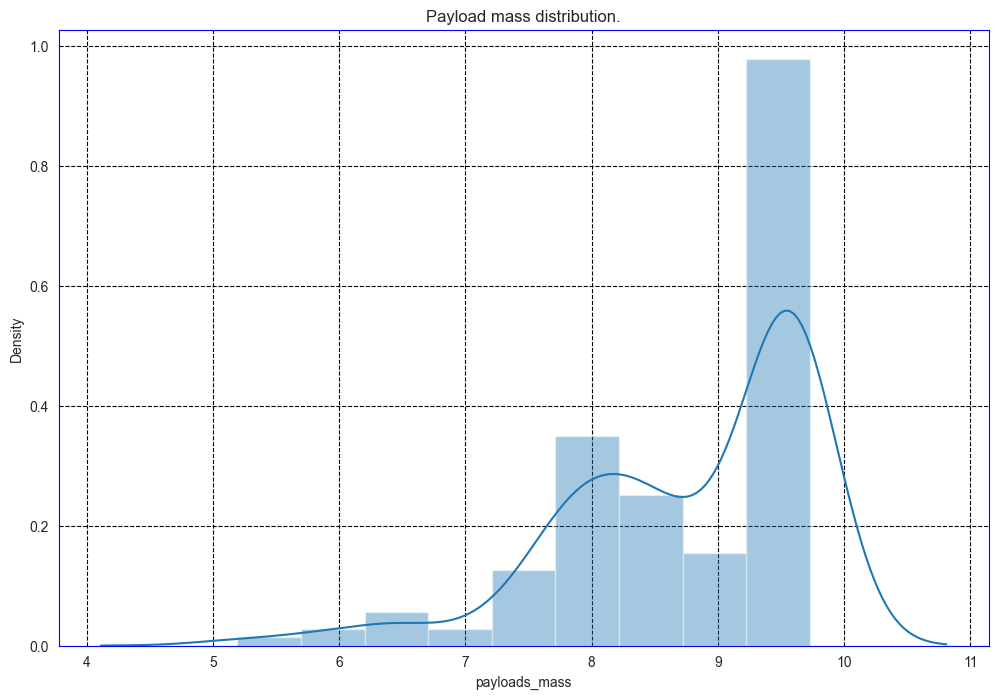

In [79]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [80]:
# YOUR CODE HERE
# raise NotImplementedError()
mass_range = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()

In [81]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [82]:
# YOUR CODE HERE
# raise NotImplementedError()
lower_interval = int(raw_df['payloads_mass'].min() // 1)
upper_interval = int(raw_df['payloads_mass'].max() // 1)

In [83]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [84]:
# YOUR CODE HERE
interval_size = (upper_interval - lower_interval) / 4
total_bins = 4 
#raise NotImplementedError()

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [85]:
# YOUR CODE 
bins = ['bin_no_1','bin_no_2','bin_no_3','bin_no_4']
# raise NotImplementedError()

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [86]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'],4,labels=bins)
# raise NotImplementedError()

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

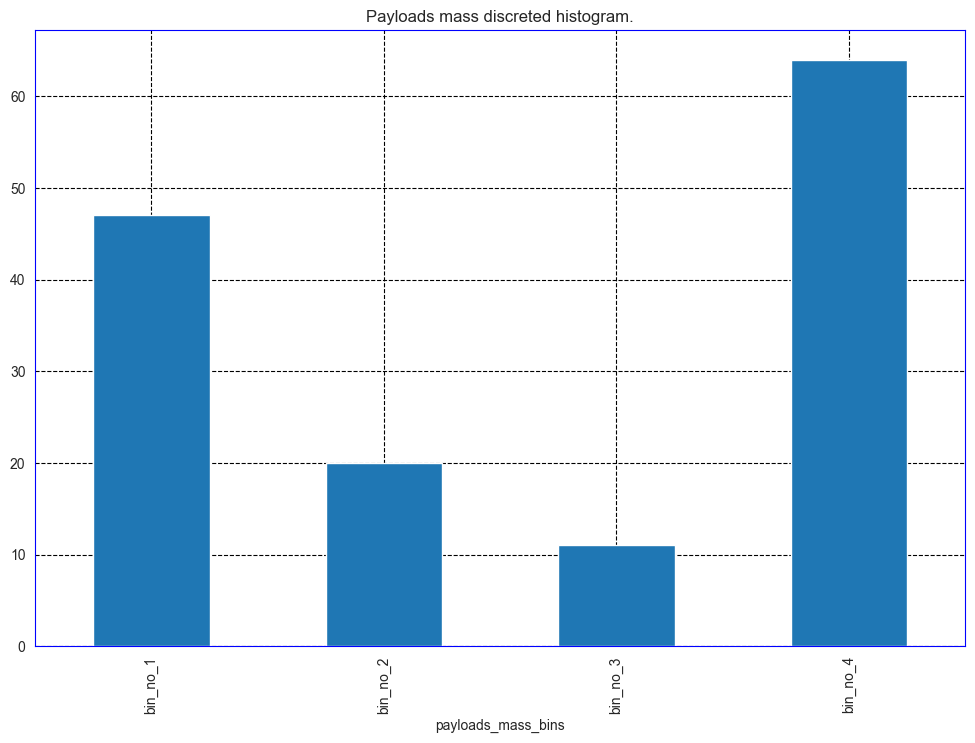

In [87]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

It is clear that the majority of the payloads are in the 1st and 4th bin, there are only 10 in the 3rd bin

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [88]:
# YOUR CODE HERE
qcut_bins = pd.qcut(x=raw_df['payloads_mass'],q=4)
# raise NotImplementedError()
# print(qcut_bins)

- Step 02: Create bin labels

In [89]:
# YOUR CODE HERE
bins = ['bin_no_1','bin_no_2','bin_no_3','bin_no_4']
# raise NotImplementedError()

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [90]:
# YOUR CODE HERE
qcut_bins  = pd.cut(raw_df['payloads_mass'],4,labels=bins)
raw_df['payloads_mass_bins'] = qcut_bins.copy()
# raise NotImplementedError()

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

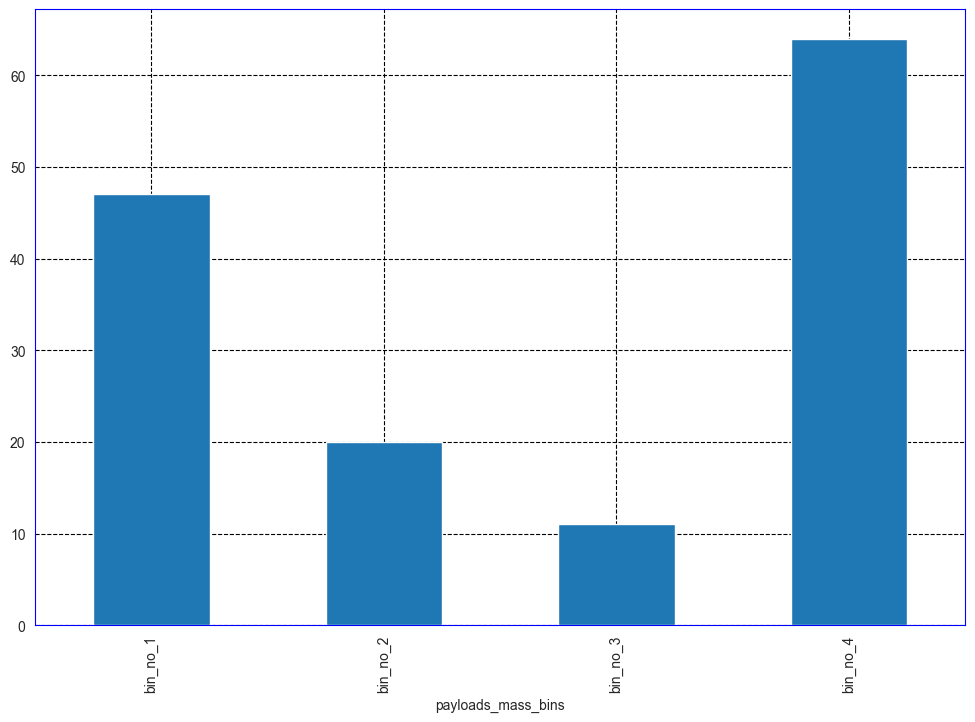

In [91]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

In [92]:
# YOUR CODE HERE (Optional)
# raise NotImplementedError()

In [93]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e79f7646a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e79f767880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e79f767bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e79f764bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e79f765a20>],
 'means': []}

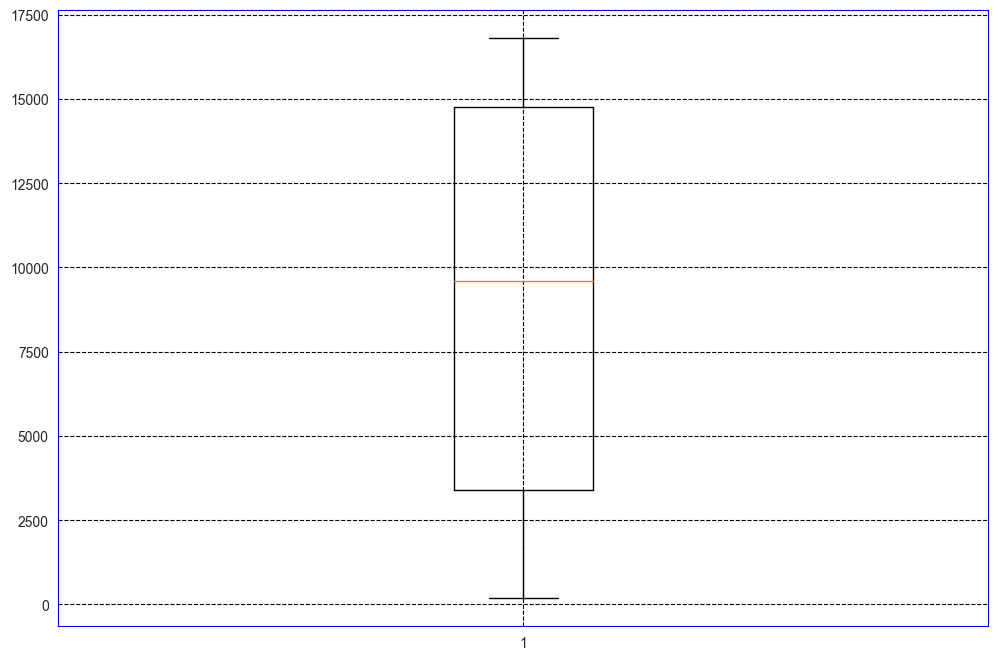

In [94]:
# YOUR CODE HERE

plt.boxplot(raw_df['payloads_mass'])
# frame['ArrDelay'].plot.box(ax=ax) # Alternative

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [95]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [96]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [97]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 43), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

- Advantages: Models less skewed by anomalies, potentially improving prediction accuracy
- Disadvatages: Valuable information can be lost, especially if outliers are meaningful, risks of altering data structure

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

Outliers are usually defined as data points that are more than 1.5 times the IQR distance above Q3 or 1.5 times below Q1

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [98]:
# YOUR CODE HERE
upper_bound = raw_df['payloads_mass'].mean() + 3 * raw_df['payloads_mass'].std()
lower_bound = raw_df["payloads_mass"].mean() - 3 * raw_df['payloads_mass'].std()

print(f"The lower bound for payloads limitation: {lower_bound}")
print(f"The upper bound for payloads limitation: {upper_bound}")
# raise NotImplementedError()

The lower bound for payloads limitation: -7879.781589559663
The upper bound for payloads limitation: 26099.523843080788


- Step 02: Construct rule for trimming outliers.

In [99]:
# YOUR CODE HERE'
outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)
# raise NotImplementedError()

- Step 03: Trimming outliers

In [100]:
# YOUR CODE HERE
rawdf_using_mean_std = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, rawdf_using_mean_std.shape
# raise NotImplementedError()

((142, 43), (142, 43))

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

Advantages:
- Use all the observations in the data, so they capture all the information available.
- Easy to calculate and interpret, and they are widely used in many fields and applications.
- Suitable for data that are normally distributed, or symmetric and bell-shaped, because they reflect the center and spread of the data well.

Disadvantages:
- They are affected by outliers, or extreme values that differ from most other data points. Outliers can inflate the mean and standard deviation and make them misleading.
- Inappropriate for skewed data that are skewed, or asymmetric and have a long tail in one direction.


### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [101]:
# YOUR CODE HERE
lower_quantile_mass = raw_df["payloads_mass"].quantile(0.1)
upper_quantile_mass = raw_df["payloads_mass"].quantile(0.9)

print(f"The lower bound for payloads limitation: {lower_quantile_mass}")
print(f"The upper bound for payloads limitation: {upper_quantile_mass}")
# raise NotImplementedError()

The lower bound for payloads limitation: 2200.0
The upper bound for payloads limitation: 15600.0


- Step 02: Construct rule for trimming outliers.

In [102]:
# YOUR CODE HERE
outliers_quantile = np.where(
    raw_df["payloads_mass"] < lower_quantile_mass,
    True,
    np.where(raw_df["payloads_mass"] > upper_quantile_mass , True, False),
)
# raise NotImplementedError()

- Step 03: Trimming outliers

In [103]:
# YOUR CODE HERE
rawdf_using_quantile = raw_df.loc[~(outliers_quantile), ]

raw_df.shape, rawdf_using_quantile.shape
# raise NotImplementedError()

((142, 43), (120, 43))

TODO: What are the advantages and disadvantages of using Quantiles?

Advantages:
- Can help to visualize the shape and spread of the data, especially in box plots or histograms.
- Useful for ordinal data, where the order of the values matters but not the exact magnitude.
- Can be robust to outliers because they do not depend on the mean or standard deviation of the data.

Disadvantages:
- Possible loss of information by grouping continuous data into discrete categories, which may hide important patterns or trends.
- They can be arbitrary, as the choice of the number and location of the quantiles may affect the results and interpretation.
- Can be misleading, as they may imply equal intervals or distances between the quantiles, which may not be true.


## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [104]:
scaler = StandardScaler()

- Step 02: Fitting

In [105]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [106]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [107]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,rocket_name_Falcon 9,rocket_name_Falcon Heavy,launchpad_name_CCSFS SLC 40,launchpad_name_KSC LC 39A,launchpad_name_VAFB SLC 4E,launchpad_region_California,launchpad_region_Florida,landpad_name_ASOG,landpad_name_JRTI,landpad_name_JRTI-1,landpad_name_LZ-1,landpad_name_LZ-4,landpad_name_OCISLY,landpad_type_ASDS,landpad_type_RTLS,landpad_region_California,landpad_region_Florida,payloads_type_Crew Dragon,payloads_type_Dragon 1.1,payloads_type_Dragon 2.0,payloads_type_Satellite,payloads_orbit_GEO,payloads_orbit_GTO,payloads_orbit_HCO,payloads_orbit_HEO,payloads_orbit_ISS,payloads_orbit_LEO,payloads_orbit_MEO,payloads_orbit_PO,payloads_orbit_SSO,payloads_orbit_TLI,payloads_orbit_VLEO
0,-0.146911,0.0,-0.169521,-0.139432,0.119523,-1.189896,-0.436242,0.428878,-1.280415,1.275320,0.146911,-0.146911,0.958603,-0.692219,-0.428174,-0.428174,0.428174,-0.404888,-0.626224,8.366600,-0.303822,-0.19104,-0.893011,0.368782,-0.368782,-0.958603,0.958603,-0.210042,3.023716,-0.19104,-2.163331,-0.119523,-0.428174,-0.084215,-0.084215,2.217356,-0.244339,-0.170251,-0.275241,-0.260133,-0.119523,-0.843115
1,-0.146911,0.0,-0.169521,-0.139432,0.119523,-1.277966,-0.436242,0.428878,-1.280415,1.275320,0.146911,-0.146911,0.958603,-0.692219,-0.428174,-0.428174,0.428174,-0.404888,-0.626224,8.366600,-0.303822,-0.19104,-0.893011,0.368782,-0.368782,-0.958603,0.958603,-0.210042,3.023716,-0.19104,-2.163331,-0.119523,-0.428174,-0.084215,-0.084215,2.217356,-0.244339,-0.170251,-0.275241,-0.260133,-0.119523,-0.843115
2,-0.146911,0.0,-0.169521,-0.067744,-8.366600,-1.268397,-0.436242,0.428878,0.762040,-0.775850,0.146911,-0.146911,0.958603,-0.692219,-0.428174,-0.428174,0.428174,-0.404888,-0.626224,-0.119523,-0.303822,-0.19104,1.119807,0.368782,-0.368782,1.043185,-1.043185,-0.210042,3.023716,-0.19104,-2.163331,-0.119523,-0.428174,-0.084215,-0.084215,2.217356,-0.244339,-0.170251,-0.275241,-0.260133,-0.119523,-0.843115
3,-0.146911,0.0,-0.169521,-0.139432,0.119523,-1.253866,-0.436242,0.428878,-1.251448,1.279372,0.146911,-0.146911,0.958603,-0.692219,-0.428174,-0.428174,0.428174,-0.404888,-0.626224,-0.119523,3.291403,-0.19104,-0.893011,-2.711631,2.711631,-0.958603,0.958603,-0.210042,-0.330719,-0.19104,0.462250,-0.119523,-0.428174,-0.084215,-0.084215,-0.450988,4.092676,-0.170251,-0.275241,-0.260133,-0.119523,-0.843115
4,-0.146911,0.0,-0.169521,-0.139432,0.119523,-1.516304,2.335393,-2.335496,-1.280415,1.275320,0.146911,-0.146911,-1.043185,-0.692219,2.335497,2.335497,-2.335497,-0.404888,1.596872,-0.119523,-0.303822,-0.19104,-0.893011,0.368782,-0.368782,-0.958603,0.958603,-0.210042,-0.330719,-0.19104,0.462250,-0.119523,-0.428174,-0.084215,-0.084215,-0.450988,-0.244339,-0.170251,3.633180,-0.260133,-0.119523,-0.843115


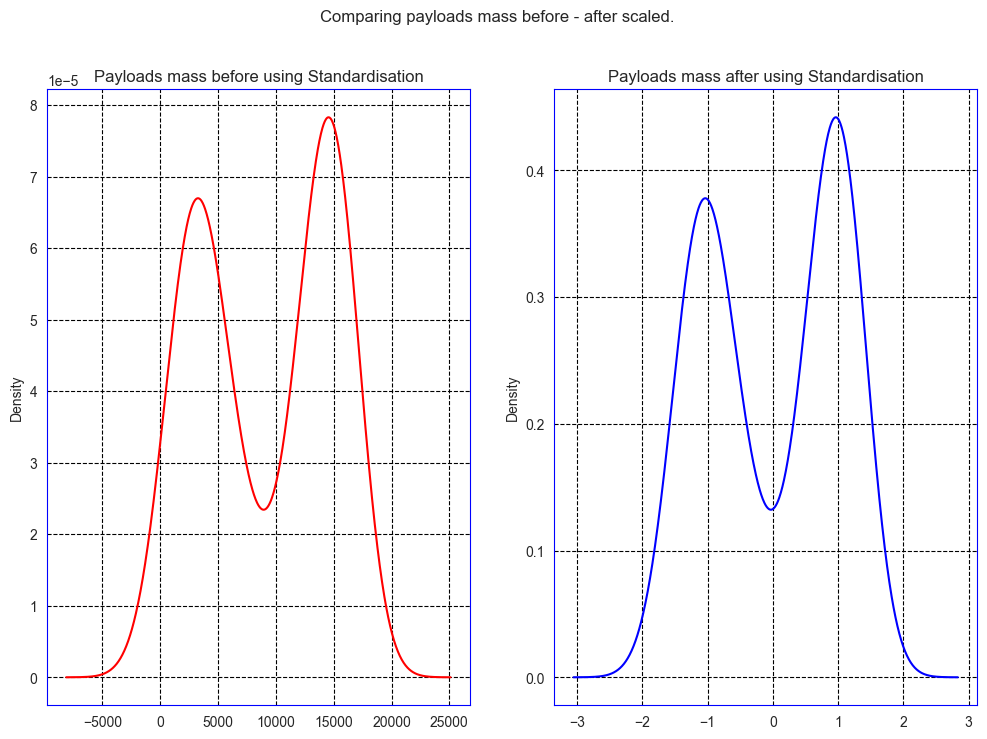

In [108]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

The mass got scaled back to around -3 to 3, which is significantly smaller compared to the pre-scaling raw_df

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

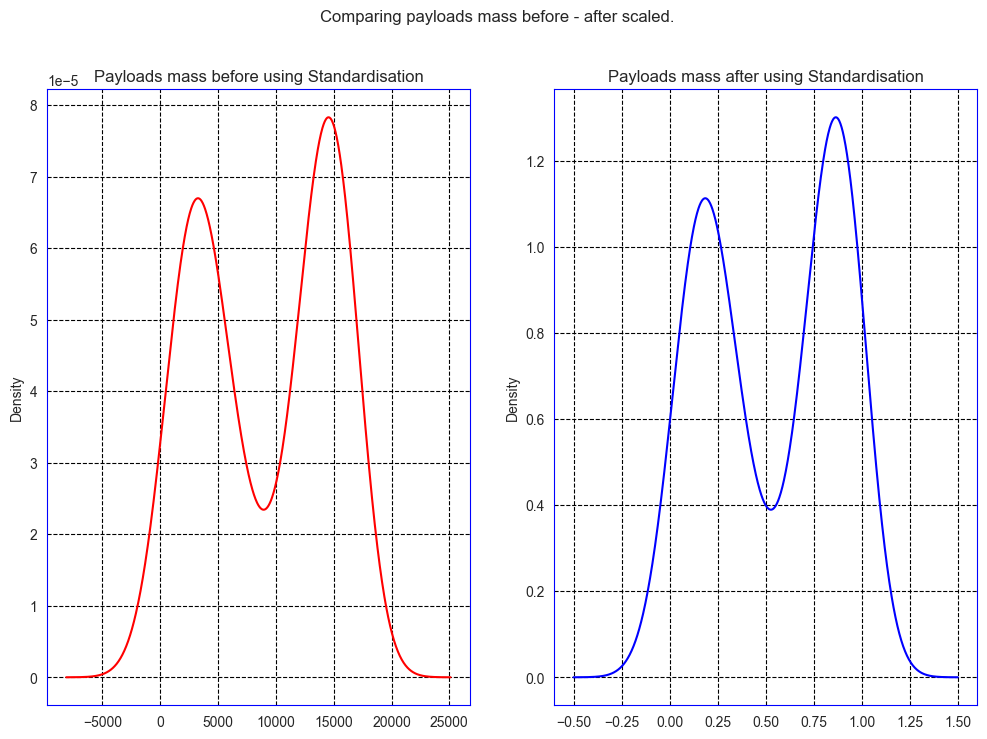

In [109]:
# YOUR CODE HERE
min_max_scaler = MinMaxScaler()
# raise NotImplementedError()

raw_df_minmax = min_max_scaler.fit_transform(raw_df['payloads_mass'].values.reshape(-1, 1))
raw_df_minmax = pd.DataFrame(raw_df_minmax, columns =['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_minmax["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

The mass got scaled back to around -0.5 to 1.5, which is significantly smaller compared to the pre-scaling raw_df

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

- Mean normalization transforms the data so that it has zero mean and unit variance. It subtracts the mean of each feature from the values and divides by the standard deviation
- Mean normalization is useful when you want to ensure zero mean and unit variance for your data, which can be helpful for some algorithms that assume a normal distribution of the data, such as linear regression and logistic regression.

- Min/max scaling transforms the data so that it fits within a specific range, usually between 0 and 1. It subtracts the minimum value of each feature from the values and divides by the range.
- Min/max scaling is useful when you want to constrain the data within a specific range, which can be helpful for some algorithms that are sensitive to the magnitude of the data, such as gradient descent and neural networks.*

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

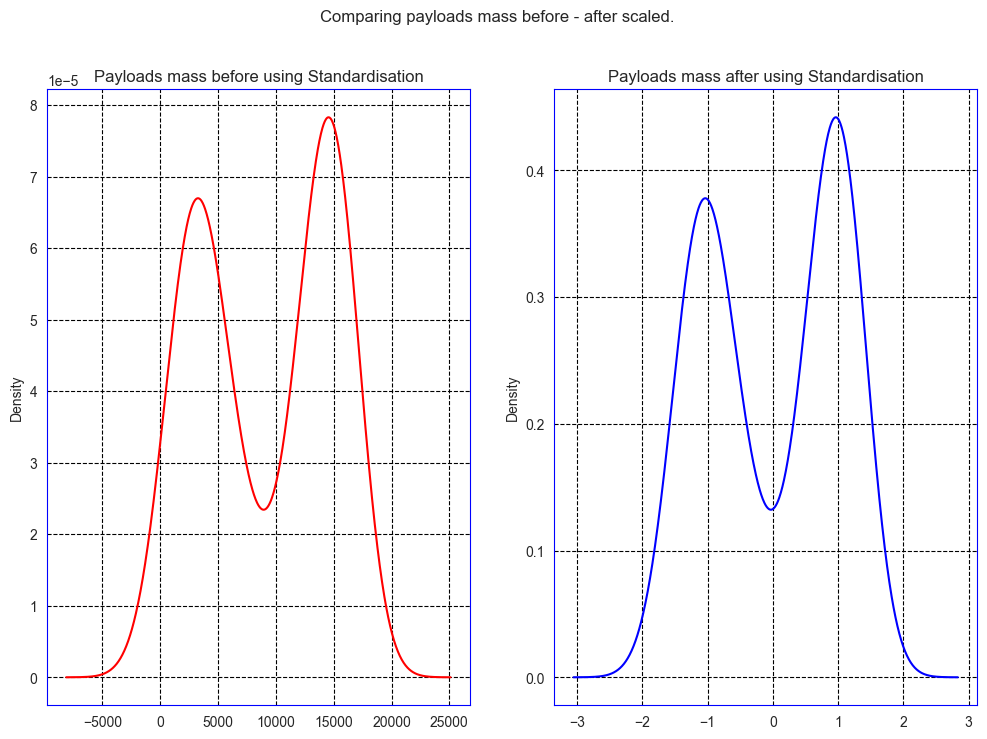

In [110]:
# YOUR CODE HERE
normalizer = Normalizer()

raw_df_normalizer = normalizer.fit_transform(raw_df.drop(["uct_time"], axis=1))
raw_df_normalizer = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_normalizer["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

The mass got scaled back to around -0.01 to 0.04, with the density ranging from to up to over 40
The result is pretty similar to min-max scaling 

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

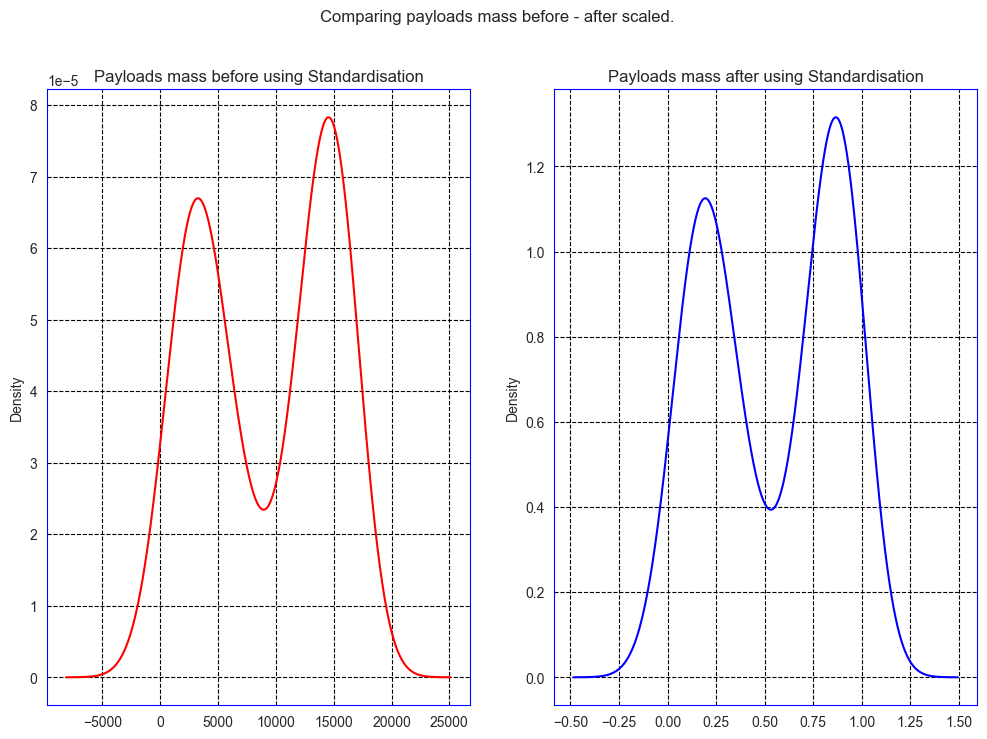

In [111]:
# YOUR CODE HERE
max_abs = MaxAbsScaler()

raw_df_max_abs = max_abs.fit_transform(raw_df['payloads_mass'].values.reshape(-1, 1))
raw_df_max_abs = pd.DataFrame(raw_df_max_abs, columns =['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_max_abs["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

The chart is nearly the same because they all got divided with the maximum values, but the range is reduced significantly

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

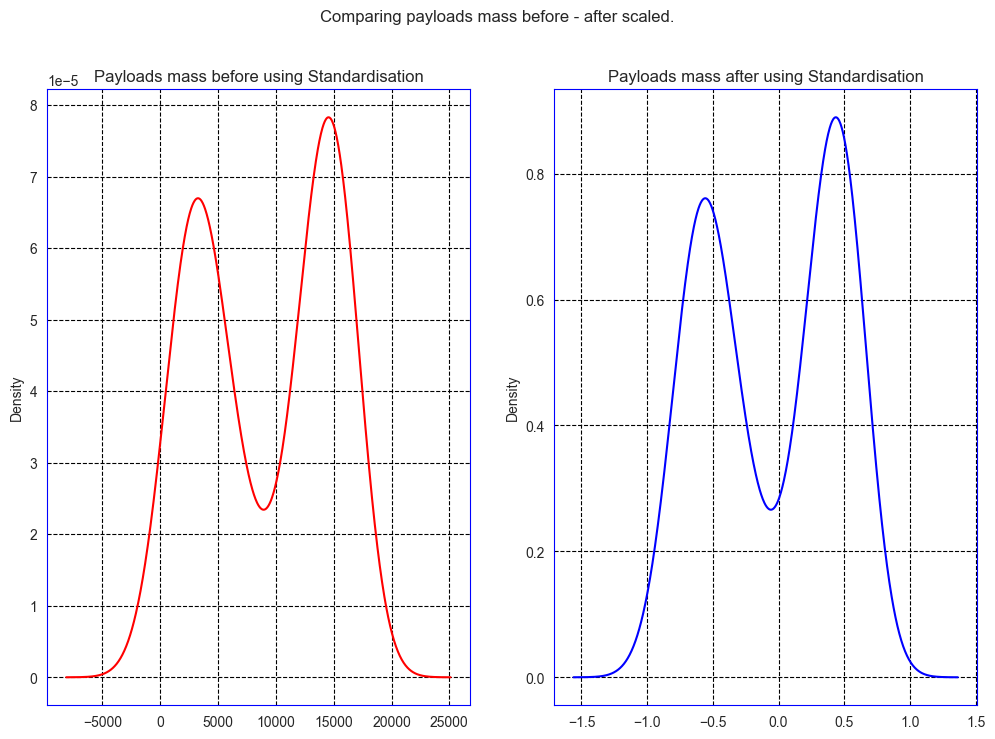

In [112]:
robust = RobustScaler()

raw_df_robust = robust.fit_transform(raw_df['payloads_mass'].values.reshape(-1, 1))
raw_df_robust = pd.DataFrame(raw_df_robust, columns =['payloads_mass'])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_robust["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

The mass got scaled back to around -1.5 to 1.5, with the density around 10% of the original

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

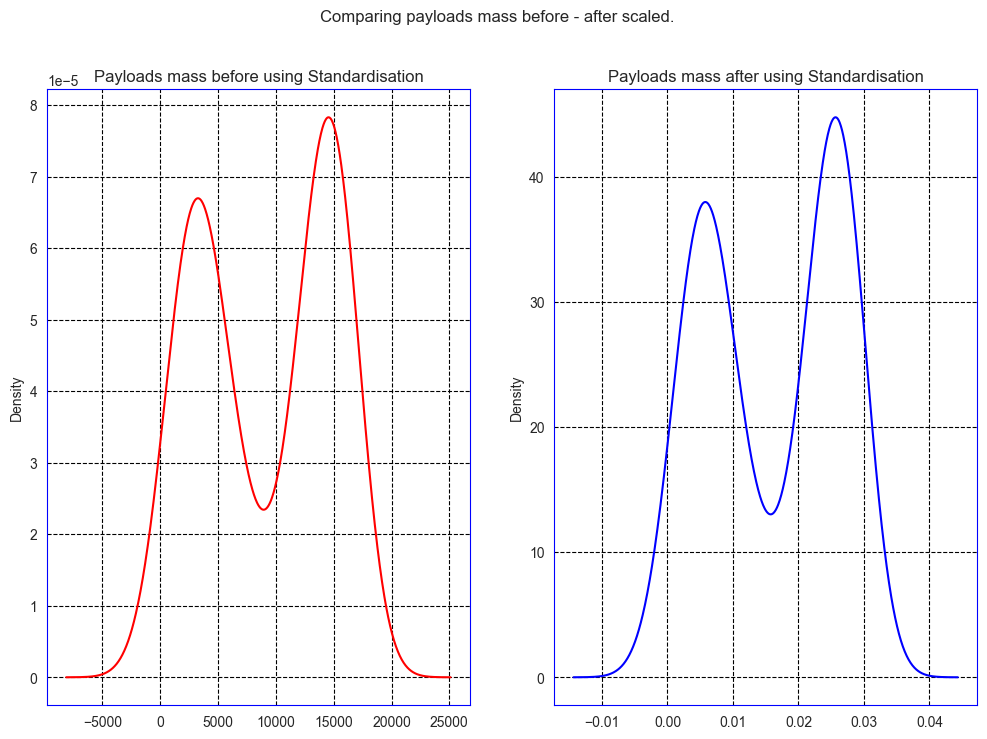

In [113]:
# YOUR CODE HERE
unit_length =Normalizer(norm="l1")

raw_df_unit_length = unit_length.fit_transform(raw_df.drop(["uct_time"], axis=1))
raw_df_unit_length = pd.DataFrame(raw_df_unit_length , columns = raw_df.drop(["uct_time"], axis=1).columns)

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_unit_length["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

While the scale is smaller (-0.01 to 0.04), the density is higher

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

- When we use algorithms that do not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks1.
- When we want to constrain the data within a specific range
- When we want to maintain the original unit interpretation of the data, such as for age or income
- Where a few values have many points and most values have few points, such as for movie ratings or word frequencies

End of your lab 01.